In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import seaborn; seaborn.set()

In [2]:
# Returns a DataFrame
df = pd.read_csv("/home/m/m301036/josie/LSAT/1900-2022LSAT/Seasonality/MPI-ESM-30runs-15yrs-running-trend.csv")

In [3]:
df

,run,month,start_year,trend
0,0,1,1958,0.683185
1,0,1,1959,0.403992
2,0,1,1960,0.114445
3,0,1,1961,0.073145
4,0,1,1962,-0.293355
...,...,...,...,...
18355,29,12,2004,1.303564
18356,29,12,2005,1.505294
18357,29,12,2006,1.233136
18358,29,12,2007,0.757099


In [21]:
# Convert the 'start_year' column to a datetime object
df['start_year'] = pd.to_datetime(df['start_year'], format='%Y')

# Group the data by month and run
grouped = df.groupby(['run', 'month'])

# Select the last trend value for each month and run, and put them into a new two-dimensional array
data = np.array([[grouped.get_group((run, month))['trend'].values[-9] for month in range(1, 13)] for run in range(30)])



In [22]:
data.shape

data_array = xr.DataArray(data, coords=[range(30), range(1, 13),], dims=['run', 'month'])
data_array

<xarray.DataArray (run: 30, month: 12)>
array([[ 0.27510298, -0.73899572, -0.1414173 ,  0.1429072 ,  0.2368319 ,
         0.34017145,  0.08771598,  0.32888015,  0.38371647,  0.33767197,
         0.74660417,  0.10771248],
       [ 0.32016818,  0.28679891,  0.4114049 ,  0.17549343,  0.48528156,
         0.24200098,  0.26157537,  0.52180223,  0.15530665,  1.30388733,
         1.22241574,  1.07014284],
       [ 0.3245374 ,  0.8982329 ,  0.52007076, -0.13587011,  0.00634256,
         0.22213526,  0.57021184,  0.26799347,  0.21859894,  0.3684992 ,
         1.06055673,  1.7832099 ],
       [ 1.32415402,  1.25947289,  1.26063514,  0.46493042,  0.55691077,
         0.27090762,  0.1169229 ,  0.43724794,  0.40032611,  0.89159596,
         1.26637369,  1.29565043],
       [ 1.58008333,  1.45172458,  0.98932333,  0.97819793,  0.84320957,
         0.62739325,  0.91868258,  0.32911403,  0.04970631,  0.8543749 ,
         1.30119431,  0.80690392],
       [-1.03514967,  0.93981139,  0.52282788,  0.23388428,  0.03174789,
         0.11216603,  0.28330132,  0.13135635,  0.1946482 ,  0.00989405,
        -0.30416978, -0.53229084],
       [ 1.29055878,  1.18236662,  0.75808236,  1.19481252,  0.62450528,
         0.40556465,  0.15992414,  0.03704349,  0.8533777 ,  0.57159536,
...
         0.32047899,  0.59251814,  0.58082869,  0.66884856, -0.3891219 ,
        -0.16086848,  0.51261175],
       [-0.95832878, -0.02241391, -1.04957452, -0.31038916,  0.12788567,
        -0.04436302,  0.45514816,  0.16794972,  0.10549118,  0.0029344 ,
         0.64894416, -0.16328584],
       [-0.4979618 , -0.1379484 ,  0.22190316,  0.32161191,  0.17582295,
         0.08683224,  0.21645374,  0.47394782,  0.37235032,  0.43600477,
         0.38254595,  0.63843781],
       [ 0.42013393, -0.10835574,  1.05949999,  0.37700355,  0.7246486 ,
         0.71385657,  0.32986821,  0.16214426,  0.03815265, -0.10831788,
         0.79637423, -0.30174216],
       [-0.96453742,  0.4116995 , -0.24303705, -0.07655032, -0.24380345,
        -0.47478116, -0.03304459,  0.09690131,  0.26270513, -0.0530143 ,
         0.39476582,  0.47761097],
       [-0.14817797,  1.22747697,  1.19670758,  1.18543048,  0.6188221 ,
         0.55978505,  0.27221634,  0.24867002,  0.27800595,  0.81489136,
         0.8770139 ,  1.20968009],
       [ 1.49738295, -0.62409053, -1.26626706, -0.36482534, -0.03983199,
         0.57425148,  0.67599423,  0.67054619,  0.37259938,  0.94229863,
        -0.34350108, -0.52990289]])
Coordinates:
  * run      (run) int64 0 1 2 3 4 5 6 7 8 9 ... 20 21 22 23 24 25 26 27 28 29
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [18]:
#input the observed 15 yr trend
dir1= '/home/m/m301036/josie/LSAT/1900-2022LSAT/Seasonality/'
CRUTEMP = pd.read_csv(dir1+'15yr_running_CRUTEM5_NH_LSAT_trend.csv')
GISTEMP = pd.read_csv(dir1+'15yr_running_GISS_NH_LSAT_trend.csv')
MLOST   = pd.read_csv(dir1+'15yr_running_MLOST_NH_LSAT_trend.csv')
CRUTEMP.head(), GISTEMP.shape
# Group the data by month and calculate the mean of each month
CRUTEMP_monthly = CRUTEMP.groupby(CRUTEMP['month'])
GISTEMP_monthly = GISTEMP.groupby(GISTEMP['month'])
MLOST_monthly = MLOST.groupby(MLOST['month'])

# Select the trend value for each month and put them into a new array
CRUTEMP_data = np.array([CRUTEMP_monthly.get_group(month)['trend'].values[-9] for month in range(1, 13)])
GISTEMP_data = np.array([GISTEMP_monthly.get_group(month)['trend'].values[-9] for month in range(1, 13)])
MLOST_data = np.array([MLOST_monthly.get_group(month)['trend'].values[-9] for month in range(1, 13)])    


In [19]:
GISTEMP_data.shape, CRUTEMP_data.shape, MLOST_data.shape

((12,), (12,), (12,))

In [20]:
GISTEMP_data

array([ 0.17309327, -0.06736018,  0.16896117,  0.99711952,  0.58618417,
        0.58169195,  0.22274033,  0.27923084,  0.19091446,  0.52454009,
        0.06238897,  0.3027031 ])

AttributeError: 'numpy.ndarray' object has no attribute 'start_year'

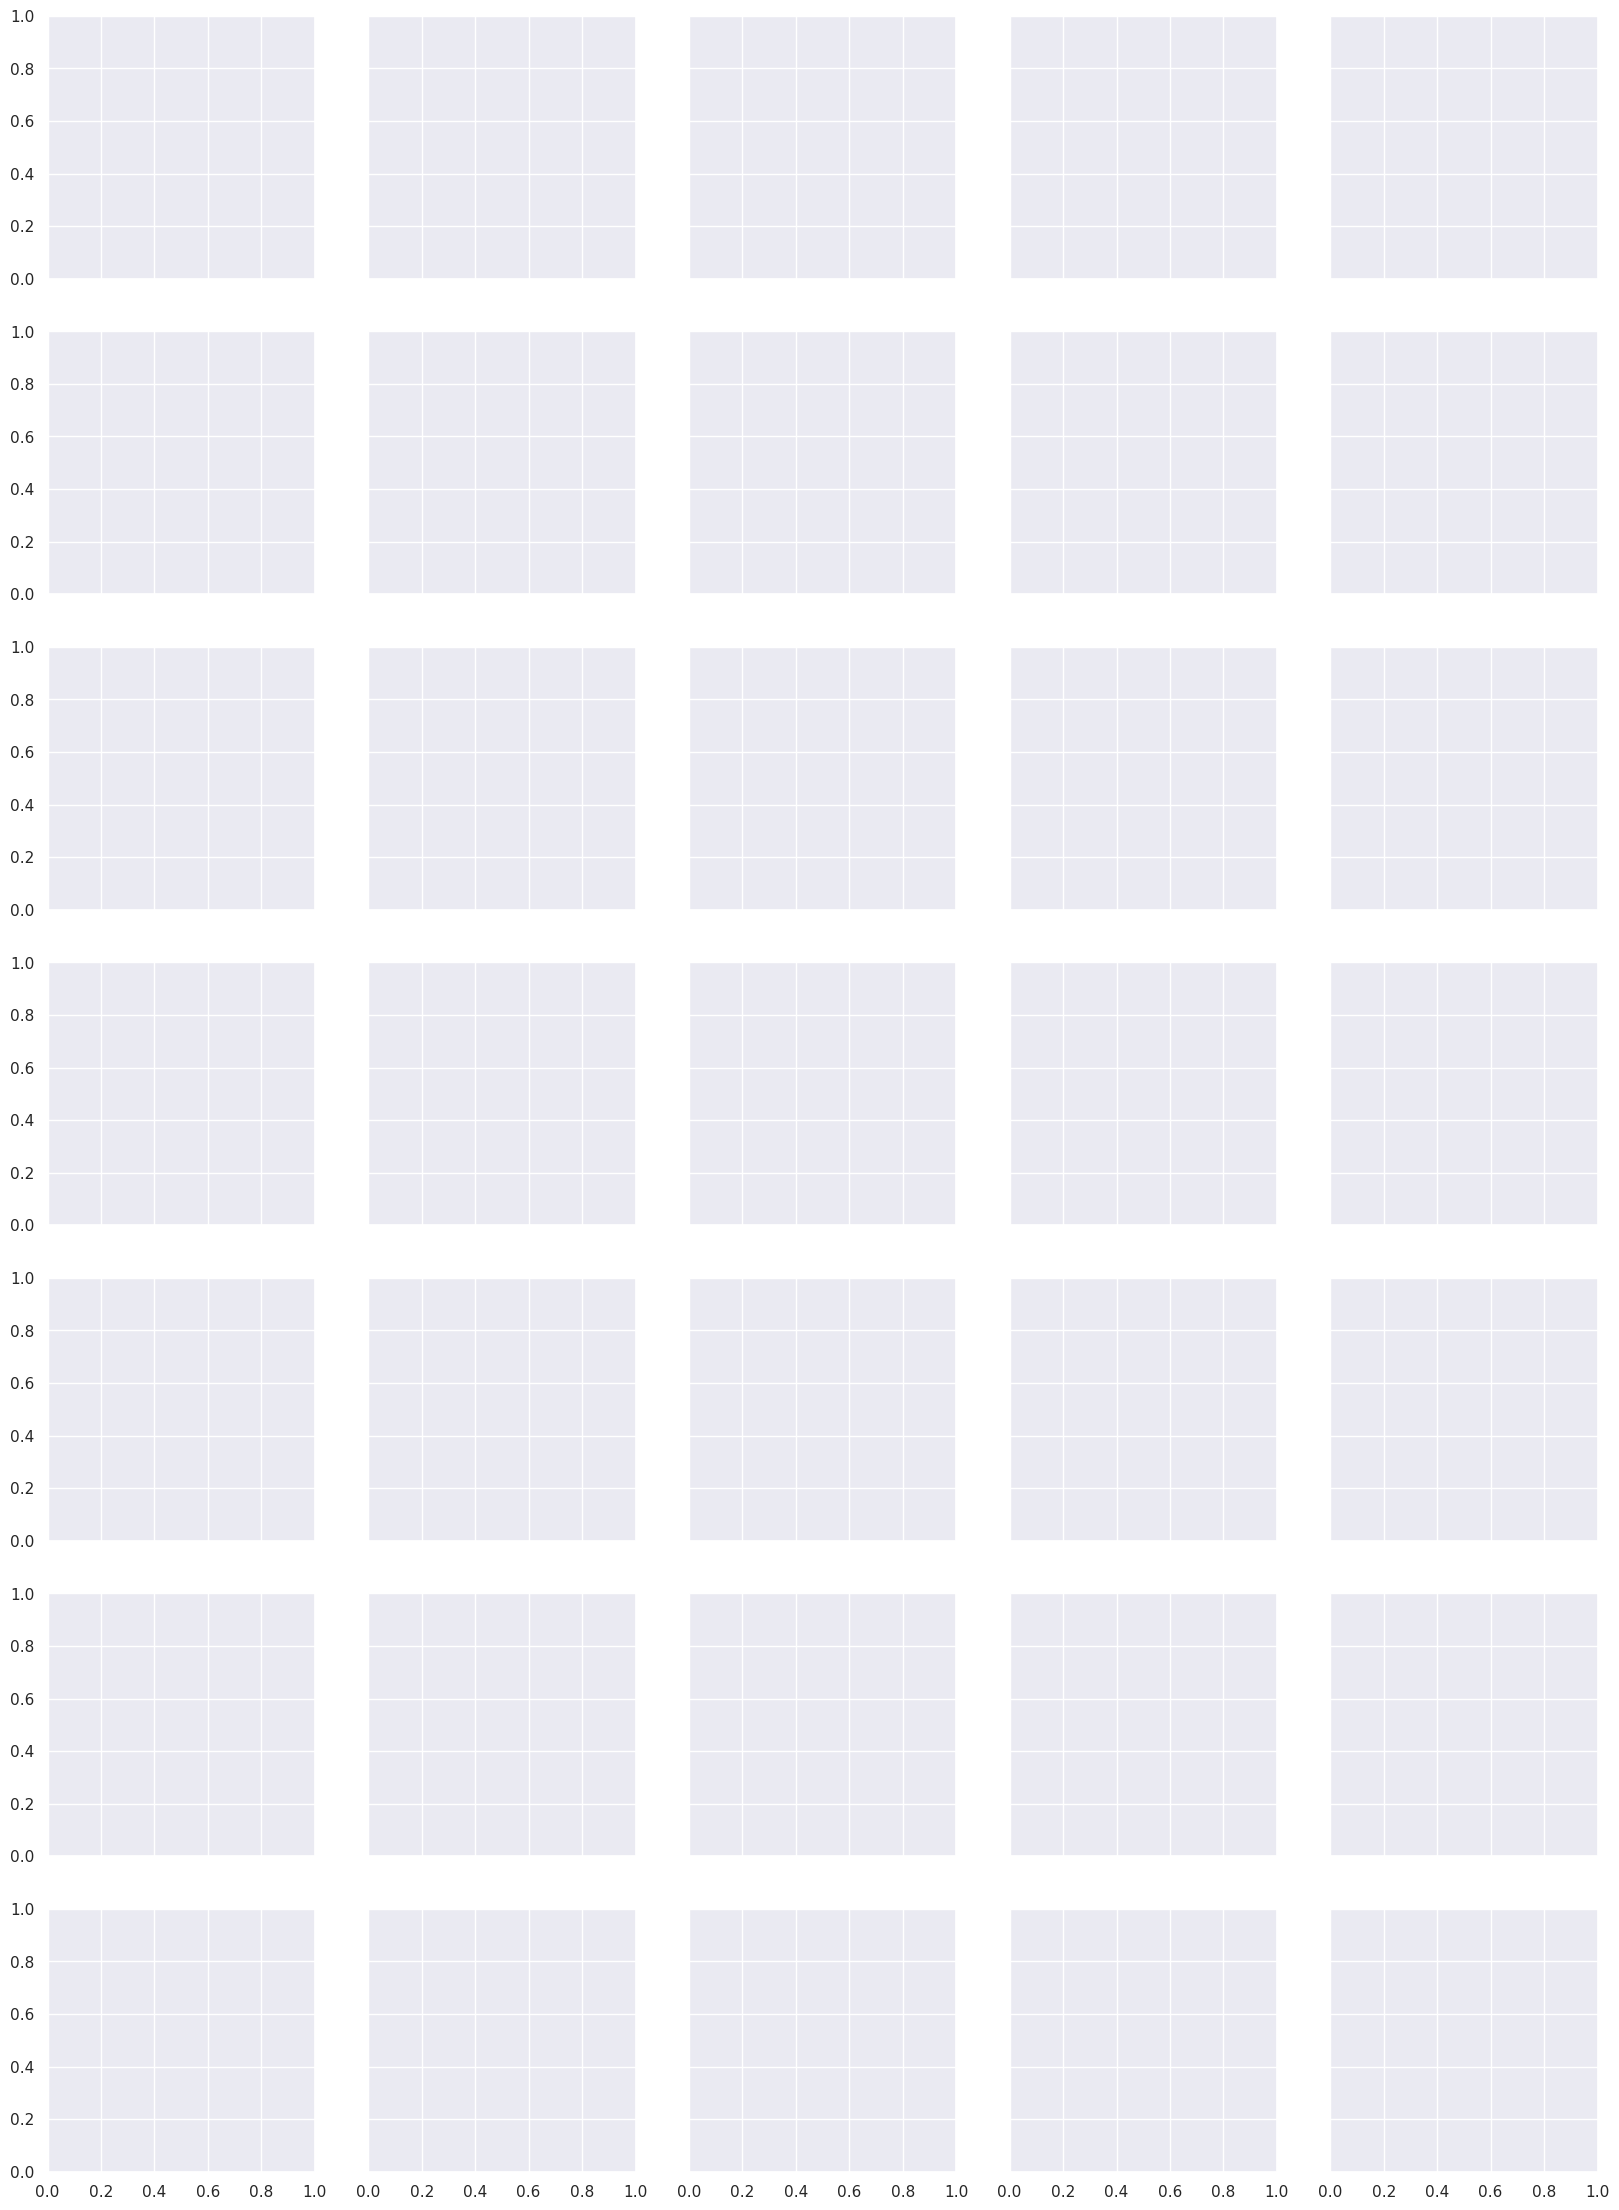

In [10]:
# Define the observed data
observed_data = np.concatenate((CRUTEMP_data, GISTEMP_data, MLOST_data)).mean(axis=0)

# Define the months
months = range(1, 13)

# Define the number of subplots
num_subplots = num_runs // 5 + 1

# Create the subplots
fig, axs = plt.subplots(num_subplots, 5, figsize=(20, 4*num_subplots), sharex=True, sharey=True)

# Flatten the subplots array
axs = axs.flatten()

# plot the observed data to each subplot as lines  
for i, ax in enumerate(axs):
    if i < len(CRUTEMP_data.start_year):
        ax.plot(range(1, 13), CRUTEMP_data.sel(start_year=CRUTEMP_data.start_year[i]))

    sns.lineplot(x=months, y=CRUTEMP_data[:,i] , ax=ax, color='red', linewidth=1)
    sns.lineplot(x=months, y=observed_data, ax=ax, color='red', linewidth=1)


sns.lineplot(x=months, y=observed_data, ax=axs[0], color='red', linewidth=1)

# Loop over each subplot
for i, ax in enumerate(axs):

    # Define the start and end years for this subplot
    start_year = i * num_years
    end_year = start_year + num_years

    # Select the data for this subplot
    da = data_array[:, :, start_year:end_year]

    # Calculate the mean trend for each month and run
    mean_trend = da.mean(axis=0)

    # Plot the mean trend for each month and run

    sns.lineplot(x=months, y=mean_trend, ax=ax, color='black', linewidth=1)

    # Overlay the scatter of each run's trend values and the MME onto each subplot
    for j in range(num_runs):
        for k in range(da.shape[1]):
            ax.scatter(x=months[k], y=da[j, k, :], color='gray', alpha=0.5, s=10)

    ax.scatter(x=months, y=observed_data, color='red', s=20)

    # Set the title for this subplot
    ax.set_title(f'{start_year}-{end_year-1}')

    # Set the x-axis label for this subplot
    if i >= num_subplots - 1:
        ax.set_xlabel('Month')

    # Set the y-axis label for this subplot
    if i % 5 == 0:
        ax.set_ylabel('Trend (°C/15yrs)')



# Set the overall title for the plot
fig.suptitle('LSATAs trend for each running window of observations', fontsize=16)

# Adjust the spacing between the subplots
fig.tight_layout()

# Show the plot
plt.show()


In [ ]:
sns.set_theme(style="dark")
flights = sns.load_dataset("flights")

# Plot each year's time series in its own facet
g = sns.relplot(
    data=flights,
    x="month", y="passengers", col="year", hue="year",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)

# Iterate over each subplot to customize further
for year, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.8, .85, year, transform=ax.transAxes, fontweight="bold")

    # Plot every year's time series in the background
    sns.lineplot(
        data=flights, x="month", y="passengers", units="year",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

# Reduce the frequency of the x axis ticks
ax.set_xticks(ax.get_xticks()[::2])

# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("", "Passengers")
g.tight_layout()

<xarray.DataArray (month: 12)>
array([0.42697871, 0.42037014, 0.36901471, 0.32358405, 0.33223324,
       0.30045161, 0.34139443, 0.32962557, 0.36239458, 0.38953585,
       0.50191896, 0.35447039])
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

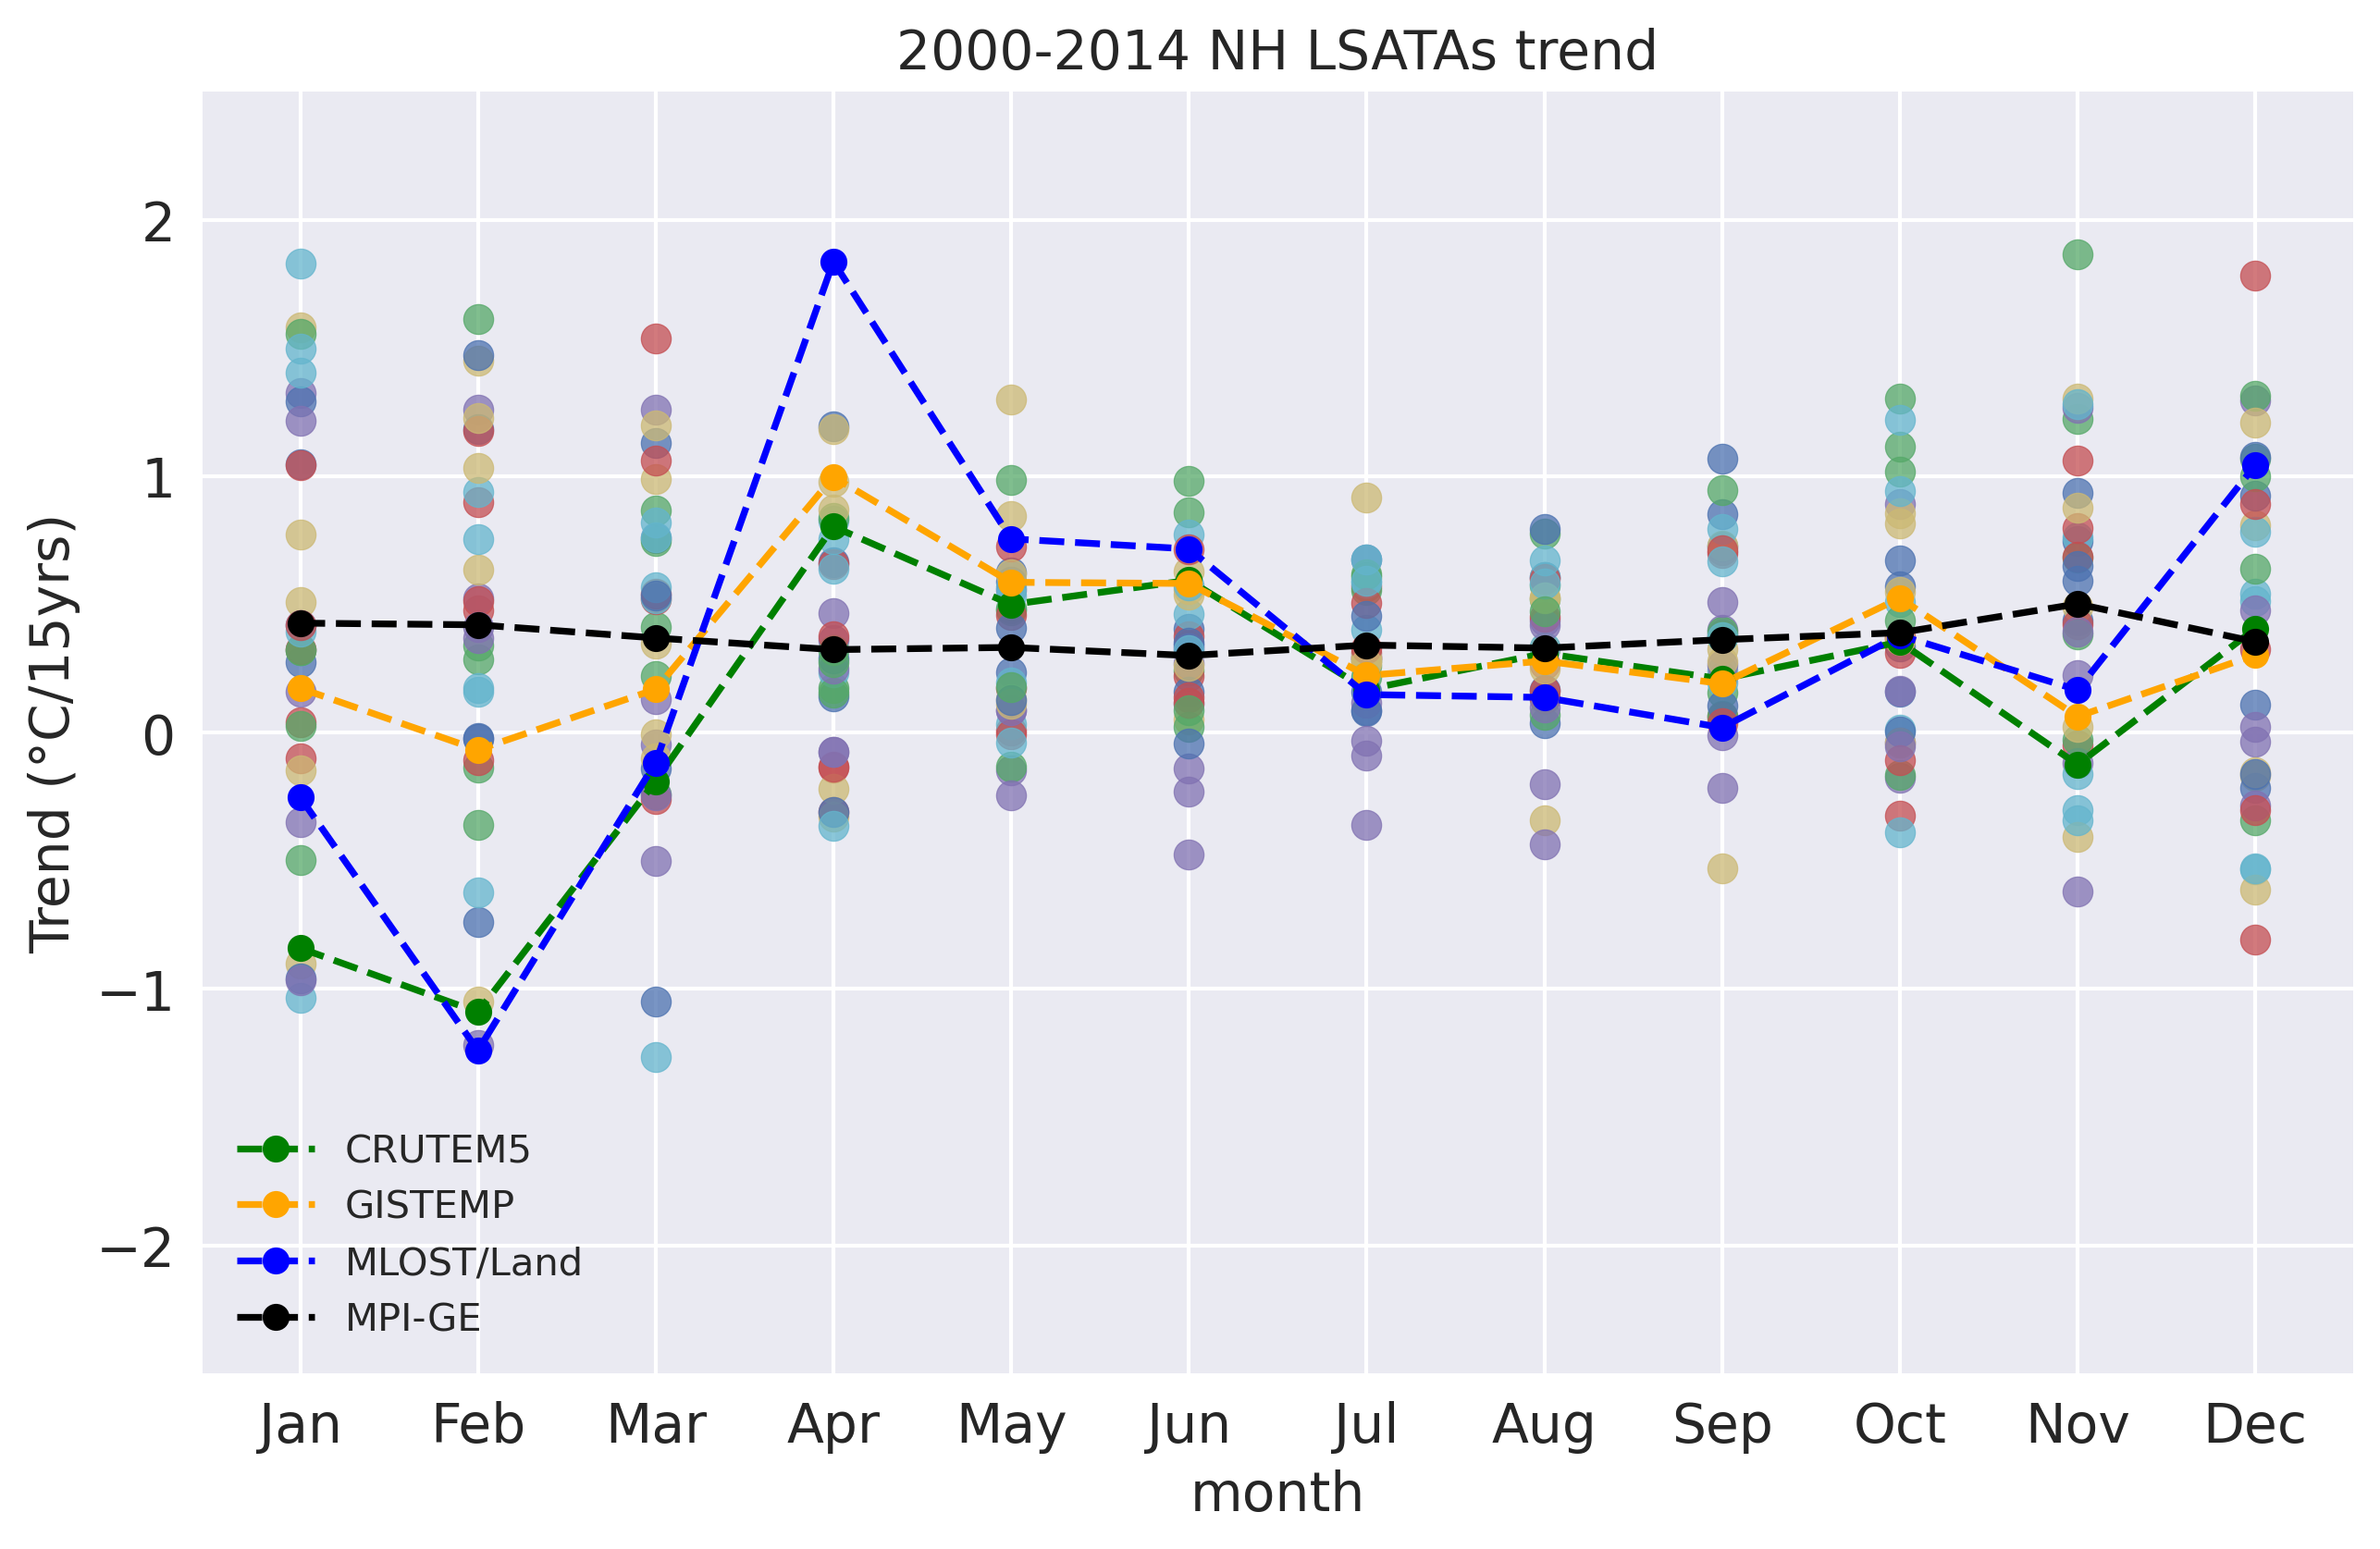

In [26]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy.feature as cfeature

plt.style.use('seaborn')

fig,ax = plt.subplots(figsize=(10,6), dpi=300)
# fig.suptitle('2000-2014yr NH LSATAs trend',fontsize=14)

x = np.arange(1,13,1)
type(x)

for i in np.arange(0,30,1):
    plt.scatter(x, data_array[i,:].values, marker='o',s=60, cmap = 'coolwarm', alpha=0.75)

trends = data_array.mean(dim='run')
display(trends)
# cbar = plt.colorbar()
# cbar.set_label('trend_value')
    
ax.plot(x, CRUTEMP_data, '--o',color='green', label='CRUTEM5')
ax.plot(x, GISTEMP_data,'--o', color='orange', label='GISTEMP')
ax.plot(x, MLOST_data,'--o', color='blue', label='MLOST/Land')
ax.plot(x, trends, '--o', color='black', label='MPI-GE')

# Set the x-axis tick positions
tick_positions = range(1, 13)  # Assuming ticks at every integer value from 1 to 12

# Set the x-axis tick labels
tick_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Apply the custom tick positions and labels
plt.xticks(tick_positions, tick_labels)
# plt.plot(x, trend_mean*15, color='black', label='MPI-GE')
ax.set_title('2000-2014 NH LSATAs trend',fontsize=14)
ax.set_ylabel('Trend (°C/15yrs)', fontsize=14)
ax.set_xlabel('month', fontsize=14)
ax.set_ylim(-2.5,2.5)
# plt.grid(visible=False, which='major', axis='y')
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.legend()


# plt.tight_out()
plt.show()

In [58]:
# Plot the data
# seaborn.lineplot(data=data, x='month', y='trend', hue='run', legend=False)
seaborn.lineplot(data=data, x='month', y='trend', hue='run', legend=False, palette='tab10', linewidth=0.5)

# seaborn.lineplot(data=data, x='month', y='trend', hue='run', legend=False, palette='tab10', linewidth=0.5, ci='sd')

# seaborn.lineplot(data=data, x='month', y='trend', hue='run', legend=False, palette='tab10', linewidth=0.5, ci='sd', err_style='bars')

# seaborn.lineplot(data=data, x='month', y='trend', hue='run', legend=False, palette='tab10', linewidth=0.5, ci='sd', err_style='bars', err_kws={'capsize': 2})


ValueError: Could not interpret value `trend` for parameter `y`

In [8]:
# print(data.shape)
label = data['month']
label

0         1
1         1
2         1
3         1
4         1
         ..
18355    12
18356    12
18357    12
18358    12
18359    12
Name: month, Length: 18360, dtype: int64

In [11]:
data.keys
data.shape
# data[:][1:].astype(float)

(18360, 4)

In [ ]:
# data_array
data
# data[0:33], 
data.loc[2,:].values, data.loc[2][1:].values

: 

In [9]:
model_seasonal_mean = data.drop(columns=['month']).apply(pd.to_numeric).mean(axis=0)
model_seasonal_mean

TypeError: Could not convert ['GISTEMPMLOSTr1r2r3r4r5r6r7r8r9r10r11r12r13r14r15r16r17r18r19r20r21r22r23r24r25r26r27r28r29r30'] to numeric

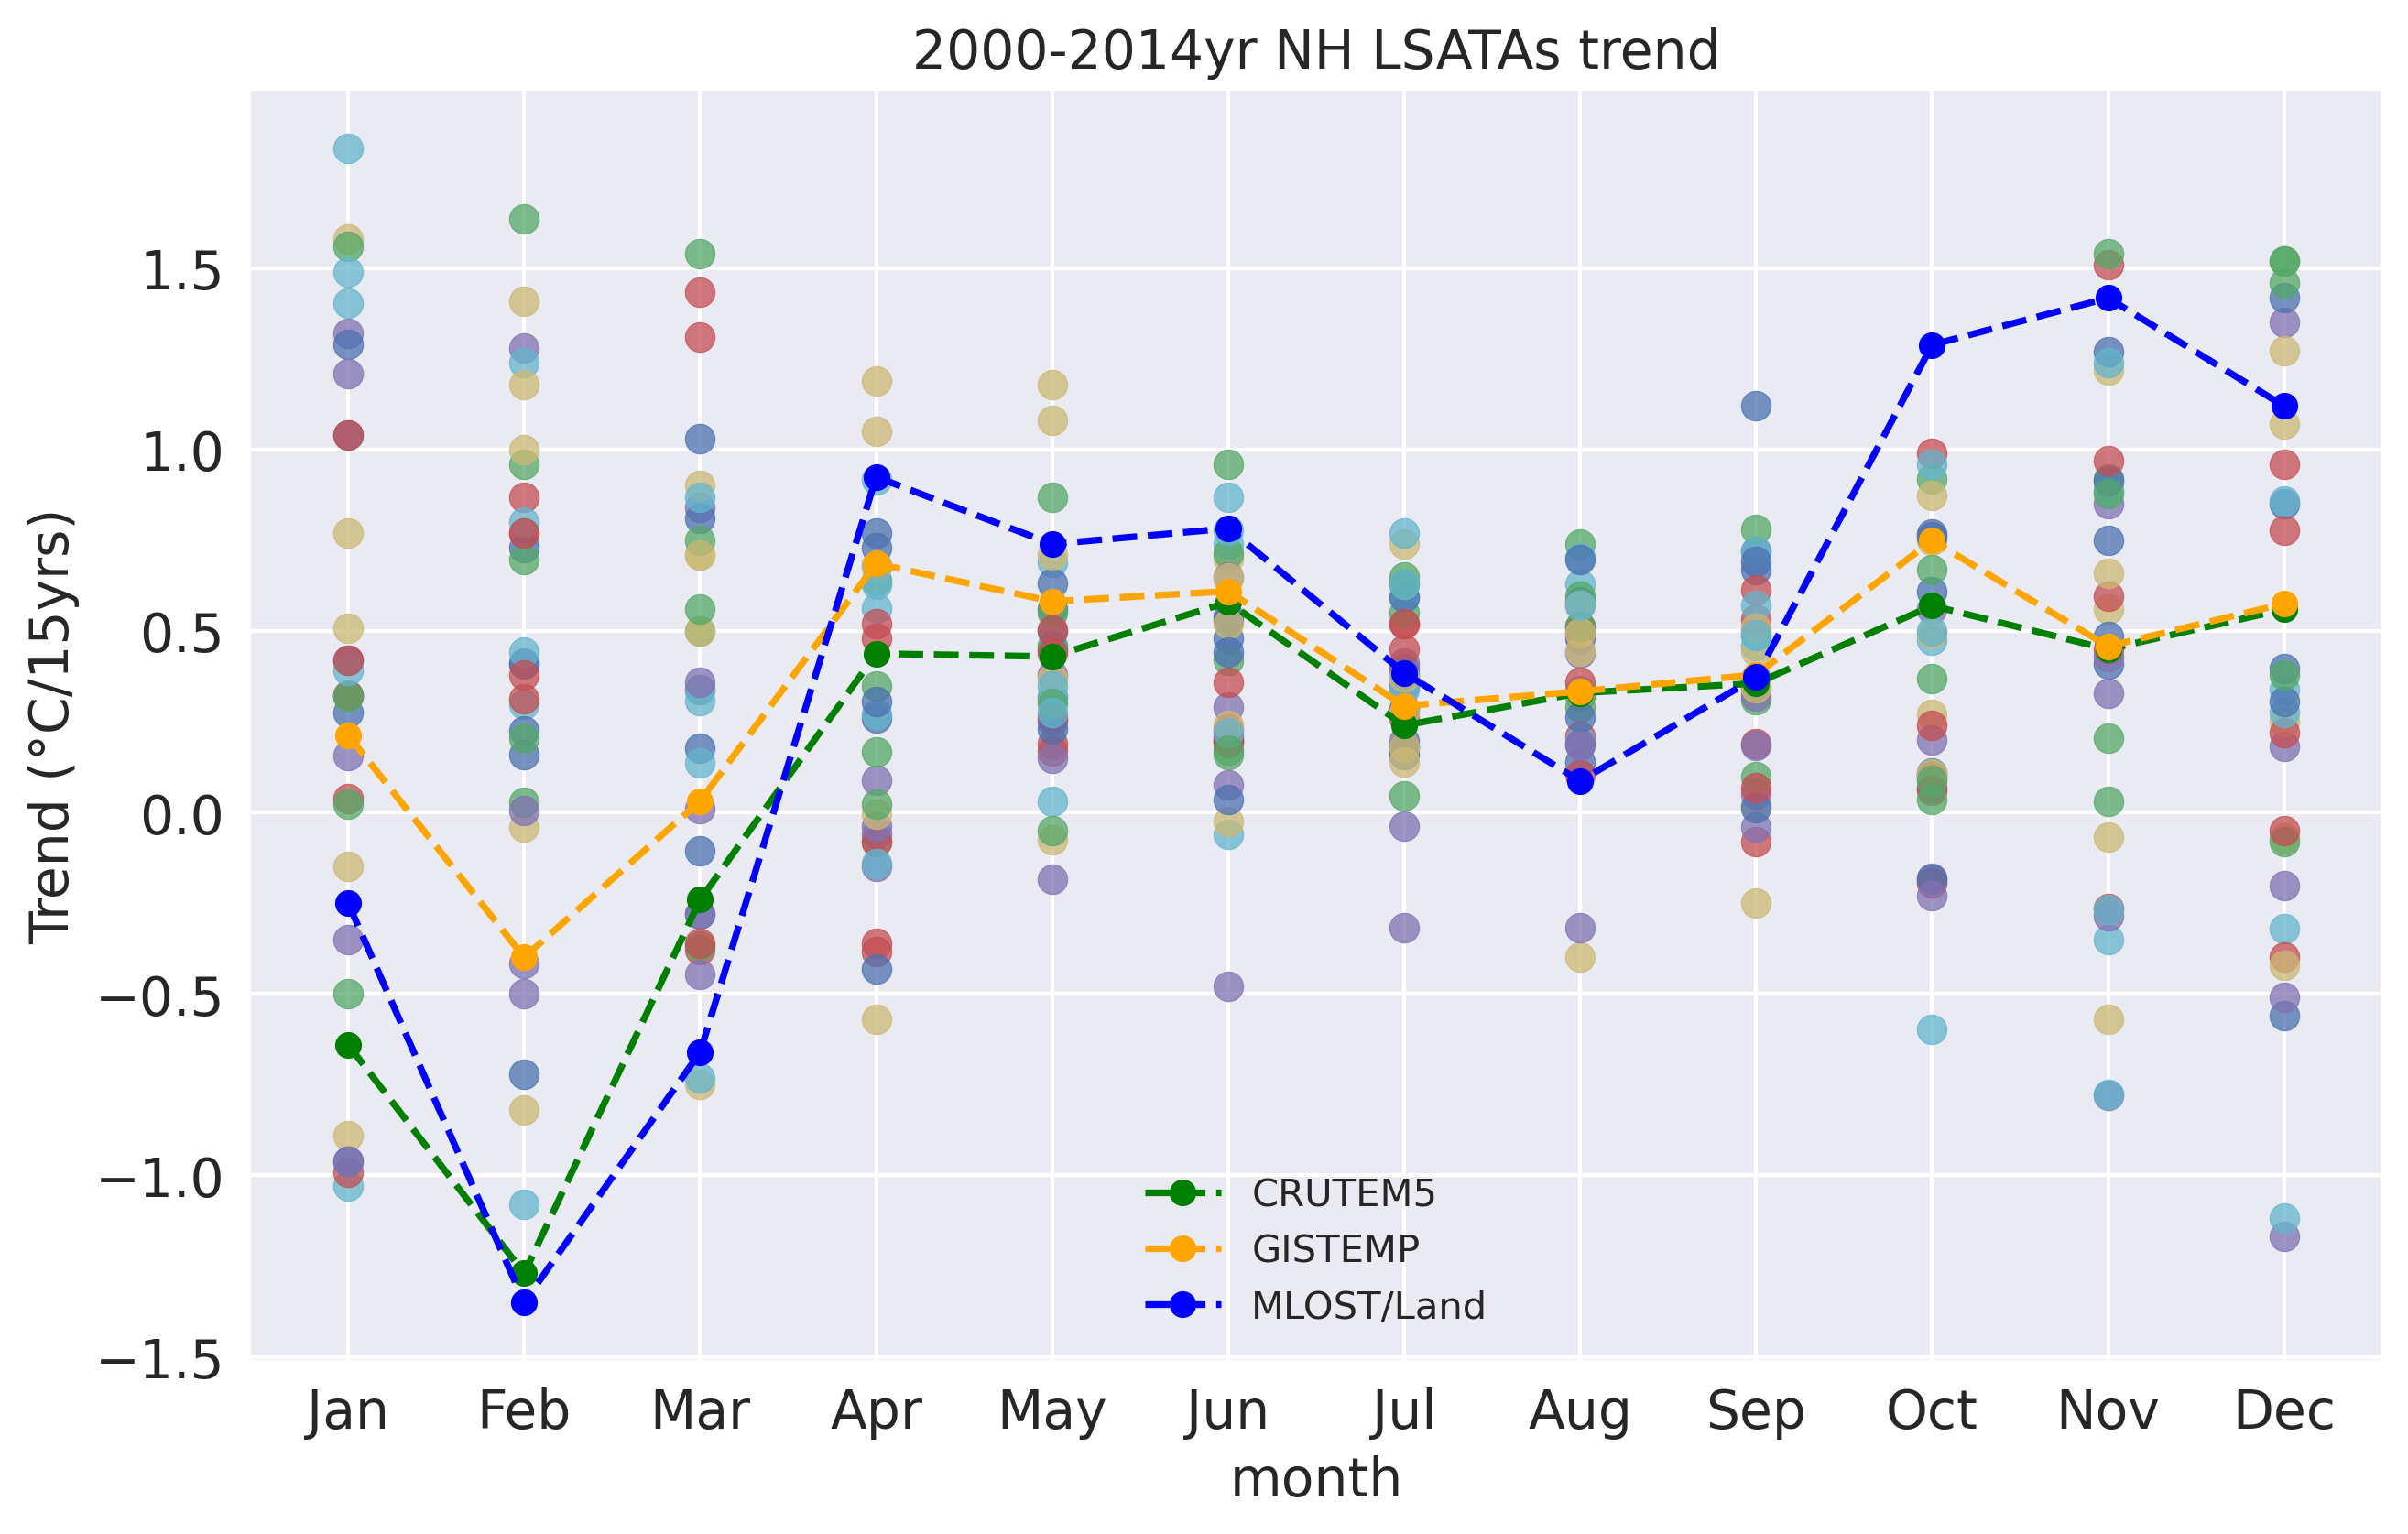

In [9]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy.feature as cfeature

plt.style.use('seaborn')

fig,ax = plt.subplots(figsize=(10,6), dpi=300)
# fig.suptitle('2000-2014yr NH LSATAs trend',fontsize=14)

x = np.arange(1,13,1)
type(x)

for i in np.arange(3,33,1):
    plt.scatter(x, data.loc[i][1:].values, marker='o',s=60, cmap = 'coolwarm', alpha=0.75)

# cbar = plt.colorbar()
# cbar.set_label('trend_value')


    
ax.plot(x, data.loc[0][1:], '--o',color='green', label='CRUTEM5')
ax.plot(x, data.loc[1][1:],'--o', color='orange', label='GISTEMP')
ax.plot(x, data.loc[2][1:],'--o', color='blue', label='MLOST/Land')


# Set the x-axis tick positions
tick_positions = range(1, 13)  # Assuming ticks at every integer value from 1 to 12

# Set the x-axis tick labels
tick_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Apply the custom tick positions and labels
plt.xticks(tick_positions, tick_labels)
# plt.plot(x, trend_mean*15, color='black', label='MPI-GE')
ax.set_title('2000-2014yr NH LSATAs trend',fontsize=14)
ax.set_ylabel('Trend (°C/15yrs)', fontsize=14)
ax.set_xlabel('month', fontsize=14)
# ax.set(xlim=(1,13,1), ylim=(-1.5,1.5))
# plt.grid(visible=False, which='major', axis='y')
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.legend()


# plt.tight_out()
plt.show()

In [23]:
fig.savefig("2000-2014-Trend-Seasonality.png",format='png')